# Hierarchical Clustering
## Credit Card Fraud Detection

In [1]:
# Se importan las librerías necesarias
import pandas as pd
import numpy as np 
from mylib import mylib
import math
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [2]:
# Se lee el archivo "creditcard.csv" disponible en Kaggle
credit_card=pd.read_csv("../Data/creditcard.csv",encoding="latin_1")
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


+ La columna "Class" te dice si se hizo fraude con esa tarjeta de crédito. El $1$ es que se hizo fraude y el $0$ significa que no se hizo fraude.

In [3]:
# Se recorta el dataset, sólo nos quedamos con el 0.1% de las filas. 
# La selección de filas se hace de forma aleatoria

# Se crea un nuevo DataFrame para que almacene los valores de las filas extraídas aleatoriamente de credit_card
longitud=math.ceil(len(credit_card)*0.005)
data=np.zeros((longitud,len(credit_card.iloc[0])))
credit_card_1=pd.DataFrame(data,columns=credit_card.columns)

# Ciclo for para extraer las filas de credit_card aleatoriamente
for i in range(longitud):
    # Fila aleatoria de credit_card
    random=np.random.randint(0,len(credit_card))
    for j in range(len(credit_card.iloc[0])):
        # Extracción de la fila y sus valores
        credit_card_1.iloc[i,j]=credit_card.iloc[random,j]

credit_card_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,37364.0,-0.999682,1.538412,0.509502,-0.485314,0.540350,-0.050640,0.552809,0.174917,-0.013572,...,-0.379383,-0.851784,-0.135866,-0.898324,0.124983,0.140200,0.549266,0.281379,5.36,0.0
1,143314.0,1.837395,-0.088287,-2.268945,1.007227,0.989485,-0.377806,0.775140,-0.252736,-0.360622,...,0.209571,0.376056,-0.138268,0.216634,0.455206,-0.515871,-0.062162,-0.052197,120.40,0.0
2,68262.0,-1.057918,1.328342,2.118577,0.718058,-0.344530,0.099953,0.105639,0.411812,-0.315843,...,-0.014731,0.092131,-0.179132,0.055949,0.119011,-0.370539,-0.058056,-0.137683,2.50,0.0
3,159432.0,-4.942659,-4.962736,1.151044,-1.033639,1.694024,-0.868115,-2.047129,0.812707,0.066222,...,0.066331,1.069374,2.672093,-0.442755,1.303877,0.165653,-0.169716,0.423526,13.90,0.0
4,141072.0,0.462489,0.990593,-0.279635,1.281833,0.147659,-0.927207,0.641252,-0.164676,-0.590705,...,0.470515,1.549596,0.006199,0.428549,-1.315716,0.089546,0.345654,0.306843,19.95,0.0
5,79334.0,-0.428694,1.044665,1.464109,-0.232778,0.205601,-0.366551,0.645933,0.060834,-0.740609,...,-0.190144,-0.483952,-0.084868,0.003511,-0.156730,0.071694,0.265954,0.108915,2.58,0.0
6,53790.0,-2.249182,1.634601,0.165413,-1.674506,-0.249791,1.269291,-0.962771,2.055097,-0.313699,...,0.126831,0.241145,0.189814,-1.342034,-0.487353,0.869256,0.156036,0.079329,0.77,0.0
7,168085.0,-0.850317,1.459002,-0.644194,-0.772787,0.777591,-0.463769,0.777935,-0.213188,0.303021,...,-0.142674,-0.722140,0.176228,0.581147,-0.590352,-0.008515,-0.868998,0.056816,4.49,0.0
8,111149.0,-0.384825,1.172785,0.213357,-0.790058,1.080805,-0.592931,0.989298,-0.270452,1.358898,...,0.165345,0.869977,-0.371584,0.438781,0.121542,-0.538184,0.260383,0.228516,1.00,0.0
9,149992.0,-0.035354,0.981791,0.448116,0.120774,0.995902,-0.766042,1.120078,-0.389077,-0.458192,...,-0.264351,-0.507622,0.027056,1.019604,-0.725562,0.234836,-0.027199,-0.016678,0.99,0.0


In [4]:
# Existen pocas tarjetas a las que se les hizo fraude, por lo que es poco probable seleccionarlas con los aleatorios
pd.value_counts(credit_card["Class"])

0    284315
1       492
Name: Class, dtype: int64

### Se cambia la metodología para seleccionar a las filas, ahora simplemente se escojen, de manera arbitraria, 100 filas que tengan en la columna "Class" 1's y 100 filas que tengan en la columna "Class" 0's.

In [5]:
# Se seleccionan 100 filas con 1's
credit_card_2=credit_card[credit_card["Class"]==1]
credit_card_2=credit_card_2.iloc[:100,:]
credit_card_2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [6]:
# Se seleccionan 100 filas con 0's
credit_card_3=credit_card[credit_card["Class"]==0]
credit_card_3=credit_card_3.iloc[:100,:]
credit_card_3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
# Se concatenan los anterios DataFrames en uno 
credit_card_4=pd.DataFrame(np.concatenate((credit_card_2,credit_card_3)),columns=credit_card.columns)
credit_card_4

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
5,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
7,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
8,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
9,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


In [8]:
# Reporte de calidad de los datos
reporte_calidad=mylib.dqr(credit_card_4)
reporte_calidad

,Nombres,Data_Types,Missing_Values,Present_Values,Unique_Values,Min,Max
Time,Time,float64,0,200,151,0.000000,35942.000000
V1,V1,float64,0,200,198,-30.552380,1.492936
V2,V2,float64,0,200,198,-5.450148,16.713389
V3,V3,float64,0,200,198,-31.103685,3.402585
V4,V4,float64,0,200,198,-4.515824,11.927512
V5,V5,float64,0,200,198,-22.105532,3.738853
V6,V6,float64,0,200,198,-4.977692,5.122103
V7,V7,float64,0,200,198,-21.922811,5.431271
V8,V8,float64,0,200,198,-3.807864,20.007208
V9,V9,float64,0,200,198,-7.175097,4.009259


In [9]:
# Se quitan las columnas innecesarias ("Time","Amount","Class")
credit_card_5=credit_card_4.loc[:,"V1":"V28"]
credit_card_5.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793


## Clustering Jerárquico

In [10]:
# Se aplica Clustering Jerárquico para ver si el algoritmo puede formar 2 grupos
# Idealmente, un grupo contendría a las tarjetas que se les hizo fraude
# Idealmente, otro grupo contendría a las tarjetas que no se les hizo fraude
# La idea es ver si el algoritmo puede encontrar patrones dadas las variables categóricas con las que contamos
Z=hierarchy.linkage(credit_card_5,metric="euclidean",method="ward")

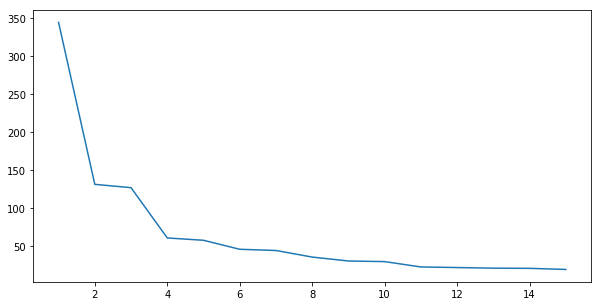

In [11]:
# Criterio del codo
last=Z[-15:,2]
last_rev=last[::-1]
idxs=np.arange(1,len(last_rev)+1)
plt.figure(figsize=(10,5))
plt.plot(idxs,last_rev)
plt.show()

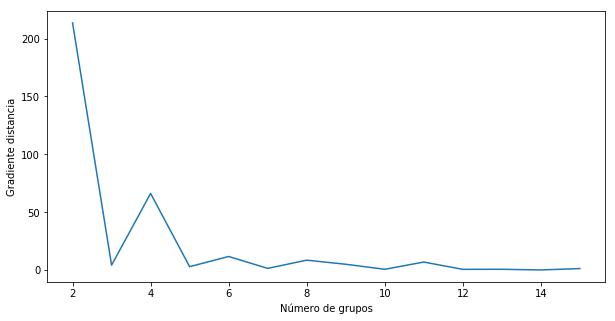

In [12]:
# Criterio del gradiente
gradiente=np.diff(last)
grad_rev=gradiente[::-1]
plt.figure(figsize=(10,5))
plt.plot(idxs[1:],grad_rev)
plt.xlabel("Número de grupos")
plt.ylabel("Gradiente distancia")
plt.show()

+ El número óptimo de clústers son 2.

In [13]:
# Cada punto se asigna al grupo que pertenece (1 o 2)
gruposmax=2
grupos=hierarchy.fcluster(Z,gruposmax,criterion="maxclust")
grupos

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [14]:
# Vector con los clasificación por grupos hecha por el algoritmo (1 o 2)
grupos=pd.DataFrame(grupos,columns=["Grupos"])
grupos.head()

,Grupos
0,1
1,1
2,1
3,1
4,1


In [15]:
# Vector con la clasificación por grupos original (0 o 1)
clase=pd.DataFrame(credit_card_4.loc[:,"Class"],columns=["Class"])
clase.head()

,Class
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [16]:
# Se crea un nuevo DataFrame para saber qué contienen los grupos generados por el algoritmo
comparar=grupos.join(clase)
comparar

,Grupos,Class
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
5,1,1.0
6,1,1.0
7,1,1.0
8,1,1.0
9,1,1.0


In [17]:
# La idea es ver qué incluyen el grupo 1 y el grupo 2 creados por el algoritmo
# El grupo 2, por poner un ejemplo, podría contener a los 1's, es decir, las tarjetas a las que se les hizo fraude
grupo_1_unos=0
grupo_1_ceros=0
grupo_2_unos=0
grupo_2_ceros=0
for i in range(len(comparar)):
    if comparar.iloc[i,0]==1:
        if comparar.iloc[i,1]==1.0:
            grupo_1_unos+=1
        else:
            grupo_1_ceros+=1
    elif comparar.iloc[i,0]==2:
        if comparar.iloc[i,1]==1.0:
            grupo_2_unos+=1
        else:
            grupo_2_ceros+=1

In [18]:
print("El grupo 1 contiene",grupo_1_unos,"tarjetas fraudulentas")
print("El grupo 1 contiene",grupo_1_ceros,"tarjetas no fraudulentas")

El grupo 1 contiene 57 tarjetas fraudulentas
El grupo 1 contiene 100 tarjetas no fraudulentas


In [19]:
print("El grupo 2 contiene",grupo_2_unos,"tarjetas fraudulentas")
print("El grupo 2 contiene",grupo_2_ceros,"tarjetas fraudulentas")

El grupo 2 contiene 43 tarjetas fraudulentas
El grupo 2 contiene 0 tarjetas fraudulentas


+ Se llega a la conclusión de que el grupo 1 contiene a las tarjetas de crédito a las que no se les hizo fraude, mientras que el grupo 2 contiene a las tarjetas de crédito a las que se les hizo fraude.
+ Se puede observar que el grupo 1 contiene varios falsos positivos.
+ El algoritmo no es muy óptimo para encontrar patrones en las variables categóricas que nos puedan clasificar a las tarjetas que se les hizo fraude de las que no, pues el grupo 1 contiene ambos casos (tarjetas fraudulentas y no fraudulentas).